In [79]:
from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister, transpile
from qiskit_aer import AerSimulator

num_qubits = 16

qr = QuantumRegister(num_qubits)
cr = ClassicalRegister(num_qubits)
qc = QuantumCircuit(qr, cr)

qc.h(0)

for i in range(num_qubits - 1):
    qc.cx(i, i + 1)


qc.measure(15, cr)

simulator = AerSimulator()
compiled_circuit = transpile(qc, simulator)

# expected : 512 (50%)
job = simulator.run(compiled_circuit, shots=1024)

counts = job.result().get_counts(qc)
print(counts)


{'0000000000000000': 502, '1111111111111111': 522}


In [80]:
print(qc)

        ┌───┐                                                                 »
 q56_0: ┤ H ├──■──────────────────────────────────────────────────────────────»
        └───┘┌─┴─┐                                                            »
 q56_1: ─────┤ X ├──■─────────────────────────────────────────────────────────»
             └───┘┌─┴─┐                                                       »
 q56_2: ──────────┤ X ├──■────────────────────────────────────────────────────»
                  └───┘┌─┴─┐                                                  »
 q56_3: ───────────────┤ X ├──■───────────────────────────────────────────────»
                       └───┘┌─┴─┐                                             »
 q56_4: ────────────────────┤ X ├──■──────────────────────────────────────────»
                            └───┘┌─┴─┐                                        »
 q56_5: ─────────────────────────┤ X ├──■─────────────────────────────────────»
                                 └───┘┌─

In [83]:
from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister, transpile
from qiskit_aer import AerSimulator
import time

num_qubits = 16

qr = QuantumRegister(num_qubits)
cr = ClassicalRegister(num_qubits)
qc = QuantumCircuit(qr, cr)

qc.h(0)

for i in range(num_qubits - 1):
    qc.cx(i, i + 1)

qc.measure(qr, cr)


simulator = AerSimulator()
start_time = time.time()
compiled_circuit = transpile(qc, simulator)
job = simulator.run(compiled_circuit, shots=1024)
result = job.result()
end_time = time.time()


counts = result.get_counts(qc)


print("Number of Qubits:", num_qubits)
print("Circuit Depth:", compiled_circuit.depth())
print("Number of Instructions:", len(compiled_circuit.data))
print("Execution Time:", round(end_time - start_time, 5), "seconds")


print("Measurement Outcomes:", counts)


Number of Qubits: 16
Circuit Depth: 17
Number of Instructions: 32
Execution Time: 0.10322 seconds
Measurement Outcomes: {'0000000000000000': 491, '1111111111111111': 533}


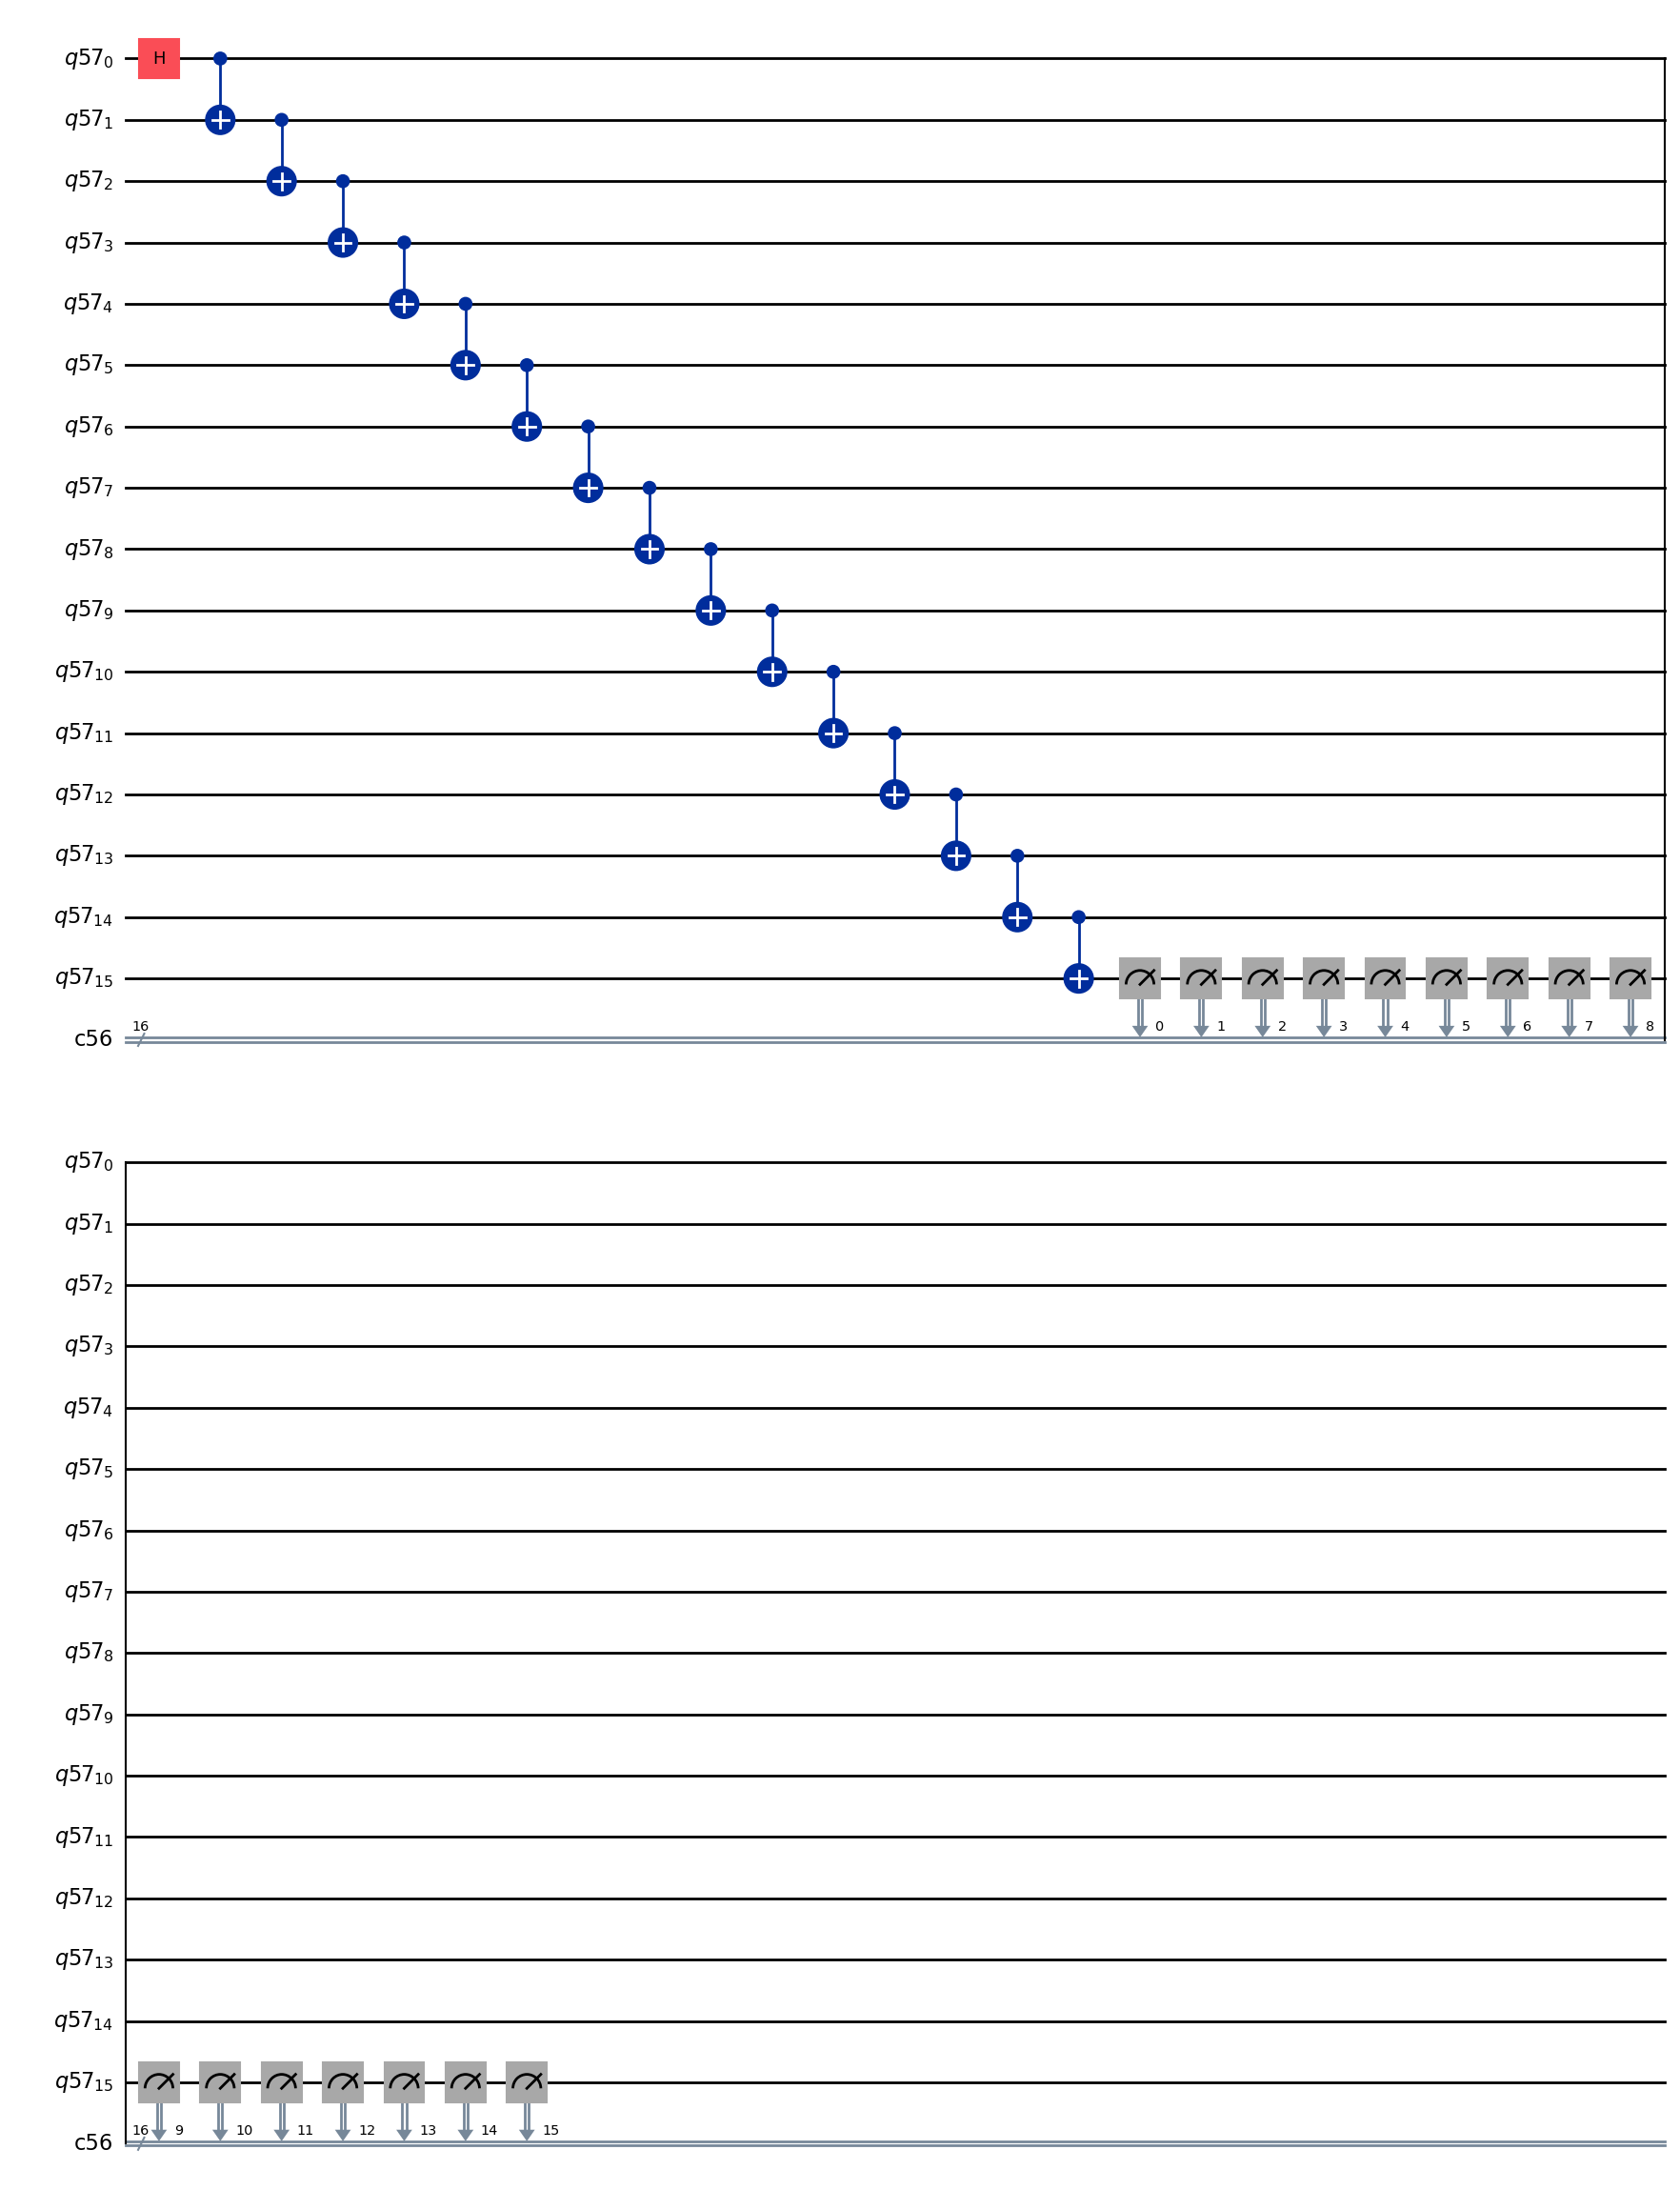

In [82]:
qc.draw('mpl')